<a href="https://colab.research.google.com/github/analuizagn/projeto-a3-ML-deteccao-cancer-de-mama/blob/main/projeto_a3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Machine Learning para Detecção de Câncer de Mama

Participantes do Grupo:
*   Ana Luiza Gomes Nunes - 202311348
*   Bianca Gomes Alves - 202220905
*   Davi Guerra Mendonça - 202311067
*   Gustavo Magosso Gomes - 202220616
<br>

O câncer de mama é uma das principais causas de mortalidade feminina, e a **detecção precoce** é crucial para o sucesso do tratamento. No entanto, o diagnóstico tradicional, baseado em exames de imagem como a mamografia, é suscetível a erros e ineficiências.

Este projeto propõe o desenvolvimento de um **modelo de Machine Learning (ML)** para aprimorar significativamente a precisão e a velocidade na identificação de lesões mamárias. Iremos utilizar a base de dados **Wisconsin Breast Cancer Dataset (WBCD)** e treinamos ela com o objetivo de criar um classificador de Inteligência Artificial que sirva como um **sistema de suporte à decisão clínica**, otimizando a triagem, reduzindo erros diagnósticos e garantindo que as pacientes recebam intervenção rápida, melhorando assim as taxas de sobrevivência.

### Configuração do Ambiente

Vamos importar todas as bibliotecas que usaremos:

  * **pandas**: Para organizar nossos dados em tabelas (DataFrames).
  * **sklearn.datasets**: Para carregar o dataset do câncer de mama.
  * **sklearn.model\_selection**: Para dividir nossos dados em conjuntos de treino e teste.
  * **sklearn.preprocessing**: Para normalizar os dados.
  * **sklearn.svm**: Onde está o nosso modelo (SVC - Support Vector Classifier).
  * **sklearn.metrics**: Para avaliar nosso modelo.

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs

### Carregando e Entendendo os Dados

Vamos carregar o dataset, que já vem incluído na biblioteca `sklearn`.

In [ ]:
# Carregando o dataset
data = load_breast_cancer()

In [ ]:
# Colocando no formato de DataFrame do pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
# Informações do DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Exibir primeiras linhas
print("\nPrimeiras 5 linhas do dataset:")
print(df.head())


Primeiras 5 linhas do dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimet

In [ ]:
# Verificar o que significa o 'target'
# 0 = Maligno, 1 = Benigno
print("\nSignificado dos alvos (target):")
print(list(data.target_names))


Significado dos alvos (target):
[np.str_('malignant'), np.str_('benign')]


Os dados são divididos em `data` (as colunas com as medições) e `target` (a resposta: 0 ou 1).

No DataFrame do pandas podemos onservar que temos **569 amostras** (pacientes) e **30 colunas** (features) e **não há dados nulos**.

O *target* (alvo) é o que queremos prever. `0` significa **maligno** (câncer) e `1` significa **benigno** (não é câncer).

### Pré-processamento:

Antes de treinar, precisamos separar nossos dados em duas partes:

1.  **X**: As *features* (as 30 colunas de medição).
2.  **y**: O *target* (a coluna "target" que diz se é 0 ou 1).

Depois, vamos **normalizar** os dados.

In [ ]:
# Separar features (X) e alvo (y)
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Dividir os dados em Treino e Teste
# 80% dos dados para treino, 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalização (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Treinando o Modelo (SVM)

Agora vamos criar o modelo SVM e treiná-lo com nossos dados normalizados.

In [ ]:
# Criando o modelo SVM
# Usamos os parâmetros padrão que são muito eficazes (kernel='rbf', C=1.0)
model = SVC(kernel='rbf')

In [ ]:
# Treinando o modelo com os dados de treino normalizados
model.fit(X_train_scaled, y_train)

SVC()

Aqui o `model = SVC(kernel='rbf')` atua como uma instância do *Support Vector Classifier* e o `model.fit(...)` é o comando para "aprender". O modelo analisa os dados `X_train_scaled` (as 30 medições) e as respostas `y_train` (0 ou 1) e tenta encontrar o melhor padrão matemático para separá-los.

### Como o SVM decide se é Maligno ou Benigno?

Considere inicialmente um cenário com apenas duas variáveis (features), "Raio" e "Textura", e coloca todos os pacientes num gráfico de pontos. Os pontos azuis (benignos) podem ficar de um lado e os vermelhos (malignos) do outro.

O SVM (Support Vector Machine) não tenta apenas desenhar uma linha no meio. Ele tenta desenhar a "rua" (ou **hiperplano**) **mais larga possível** que consiga separar os dois grupos. Os "limites" dessa rua são definidos pelos pontos mais difíceis de cada grupo (chamados de *vetores de suporte*).

**O que o sistema está levando em consideração?**

Quando o treinamos com 30 features, ele não está mais desenhando uma linha 2D. Ele está criando uma "fronteira" complexa em um **espaço de 30 dimensões**.

  * O `kernel='rbf'` permite que essa fronteira seja **curva e flexível**. Ele não precisa traçar uma linha reta.
  * Quando você dá a ele um *novo* paciente do conjunto de teste, o modelo pega as 30 medições desse paciente e simplesmente verifica: "Este novo ponto caiu do lado 'maligno' ou do lado 'benigno' da fronteira que eu criei?".

Ele está considerando **todas as 30 features simultaneamente** e sua relação complexa, definida pela fronteira que ele aprendeu durante o treino.

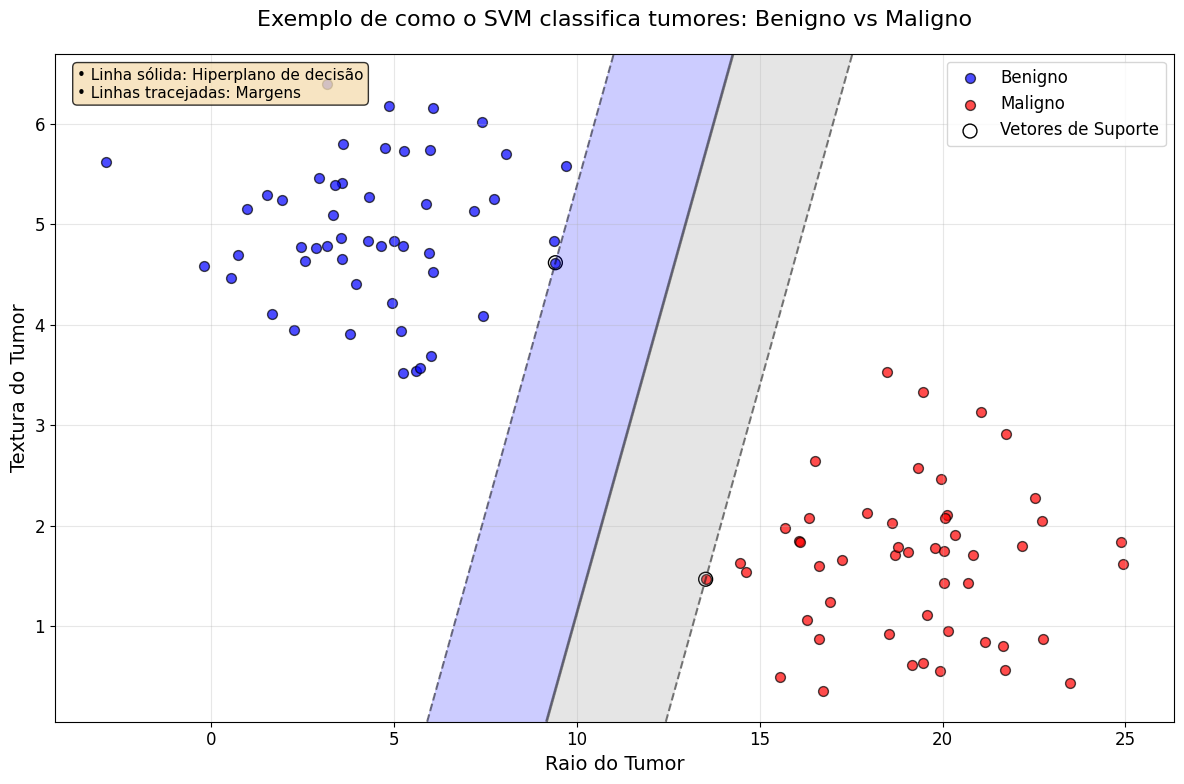

In [ ]:
plt.rcParams['font.size'] = 12

# Criar dados de exemplo - simulando tumores benignos e malignos
# Feature 1: Raio (tamanho do tumor)
# Feature 2: Textura (irregularidade)
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# Ajustar a escala para simular melhor dados reais
X[:, 0] = X[:, 0] * 2 + 10
X[:, 1] = X[:, 1] * 0.5 + 0.5

# Treinar o SVM com kernel linear
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Criar o gráfico
plt.figure(figsize=(12, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=50, label='Benigno', alpha=0.7, edgecolors='black')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=50, label='Maligno', alpha=0.7, edgecolors='black')

# Plotar o hiperplano
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Criar grid
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plotar a linha de decisão e as margens
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], linewidths=[1.5, 2, 1.5])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Vetores de Suporte')

# Destacar a margem do SVM
ax.contourf(XX, YY, Z, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'gray', 'red'])

# Configurações do gráfico
plt.xlabel('Raio do Tumor', fontsize=14)
plt.ylabel('Textura do Tumor', fontsize=14)
plt.title('Exemplo de como o SVM classifica tumores: Benigno vs Maligno', fontsize=16, pad=20)

# Adicionar legenda explicativa
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

# Adicionar anotações explicativas
plt.text(0.02, 0.98, '• Linha sólida: Hiperplano de decisão\n• Linhas tracejadas: Margens',
         transform=ax.transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

Em 30 dimensões, seria um HIPERPLANO em espaço multidimensional

### Avaliando o Modelo

Nosso modelo está treinado. Vamos usar os 20% de dados que separamos (o `X_test_scaled`) para ver o quão bem ele se sai em dados "novos".

In [ ]:
# Fazer previsões nos dados de teste
y_pred = model.predict(X_test_scaled)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy * 100:.2f}%")

# Mostrar o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Acurácia do Modelo: 98.25%

Relatório de Classificação:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



**Resultado Esperado:**

Com `StandardScaler` e os parâmetros padrão do `SVC`, a acurácia neste dataset quase sempre fica **acima de 97%** dependendo da divisão `random_state`.

**Relatório de Classificação:**
O relatório nos dá mais detalhes:

  * **Precision (Precisão):** De todos que o modelo disse ser "maligno", quantos *realmente* eram?
  * **Recall (Sensibilidade):** De todos os que *realmente* eram "malignos", quantos o modelo acertou?

### Análise de Erros (Matriz de Confusão)

Uma acurácia acima de 97% é ótima, mas o que o modelo errou? Em um problema médico, errar um "maligno" é muito pior do que errar um "benigno".

Analisando a Matriz de Confusão (Resultados Reais):

Canto superior esquerdo (Verdadeiro Negativo): Real: Maligno (0) / Previsto: Maligno (0). Quantidade: 41. (Acerto)
Canto inferior direito (Verdadeiro Positivo): Real: Benigno (1) / Previsto: Benigno (1). Quantidade: 71. (Acerto)
Canto superior direito (Falso Positivo): Real: Maligno (0) / Previsto: Benigno (1). Quantidade: 2. (Erro grave - Falso Benigno)
Canto inferior esquerdo (Falso Negativo): Real: Benigno (1) / Previsto: Maligno (0). Quantidade: 0. (Erro menos grave - Falso Maligno)


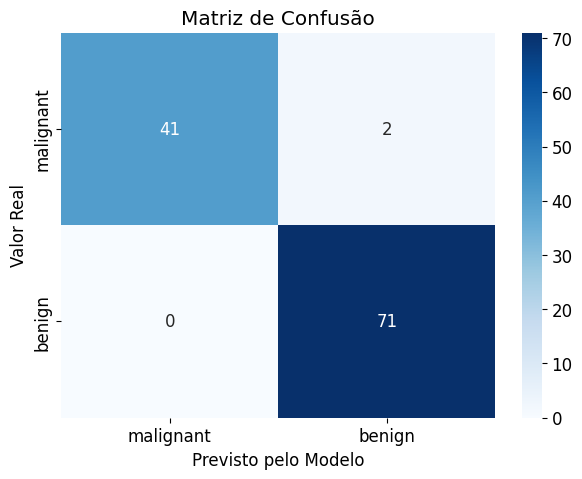

In [ ]:
# Gerar a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# O comando .ravel() pega a matriz 2x2 e "estica" ela em 4 variáveis na ordem correta
# tn = True Negative (Verdadeiro Negativo)
# fp = False Positive (Falso Positivo)
# fn = False Negative (Falso Negativo)
# tp = True Positive (Verdadeiro Positivo)
tn, fp, fn, tp = cm.ravel()

print("Analisando a Matriz de Confusão (Resultados Reais):\n")

print(f"Canto superior esquerdo (Verdadeiro Negativo): Real: Maligno (0) / Previsto: Maligno (0). Quantidade: {tn}. (Acerto)")
print(f"Canto inferior direito (Verdadeiro Positivo): Real: Benigno (1) / Previsto: Benigno (1). Quantidade: {tp}. (Acerto)")
print(f"Canto superior direito (Falso Positivo): Real: Maligno (0) / Previsto: Benigno (1). Quantidade: {fp}. (Erro grave - Falso Benigno)")
print(f"Canto inferior esquerdo (Falso Negativo): Real: Benigno (1) / Previsto: Maligno (0). Quantidade: {fn}. (Erro menos grave - Falso Maligno)")

# Visualizar a Matriz de Confusão (Gráfico)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Previsto pelo Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

Neste projeto, o modelo é extremamente bom em identificar tumores malignos e raramente comete o erro grave de classificar um câncer como benigno.

### Conclusão

Neste projeto, conseguimos transformar dados brutos de 569 pacientes em um modelo capaz de ajudar a identificar tumores malignos e benignos com alto nível de precisão. Depois de compreender as 30 medições disponíveis, preparar os dados e treinar o SVM, observamos que o modelo aprendeu padrões complexos que seriam difíceis de perceber apenas olhando para números isolados.

O resultado final — mais de 97% de acerto em dados novos — mostra como técnicas de aprendizado de máquina podem apoiar decisões importantes na área da saúde. Embora não substitua profissionais especializados, esse tipo de modelo pode servir como uma ferramenta complementar, oferecendo análises rápidas e confiáveis. Assim, o projeto demonstra não apenas a eficácia do SVM, mas também o potencial real que a tecnologia tem de contribuir para diagnósticos mais precisos e para melhorar o cuidado com os pacientes.